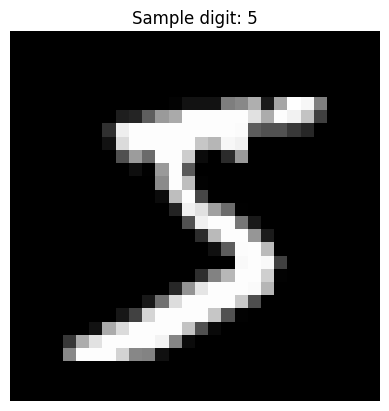

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Tanh()
  )
)


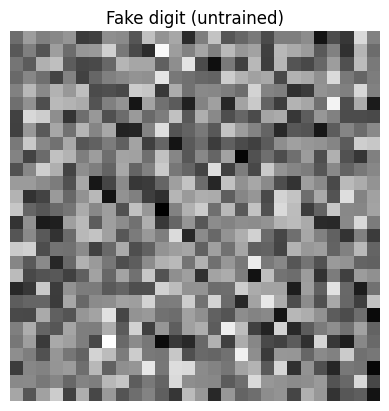

In [17]:
# Minimal training script skeleton

import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load MNIST
transform = transforms.ToTensor()
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
loader = DataLoader(mnist_train, batch_size=64, shuffle=True)

# Visualize a sample digit
image, label = mnist_train[0]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Sample digit: {label}")
plt.axis('off')
plt.show()

# Define a basic Generator model
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)

gen = Generator()
print(gen)

# Generate a fake image from random noise (untrained)
z = torch.randn(1, 100)
fake_img = gen(z).detach().squeeze().numpy()
plt.imshow(fake_img, cmap='gray')
plt.title("Fake digit (untrained)")
plt.axis('off')
plt.show()
